# Question 1


In [1]:
#Import necessary libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


256


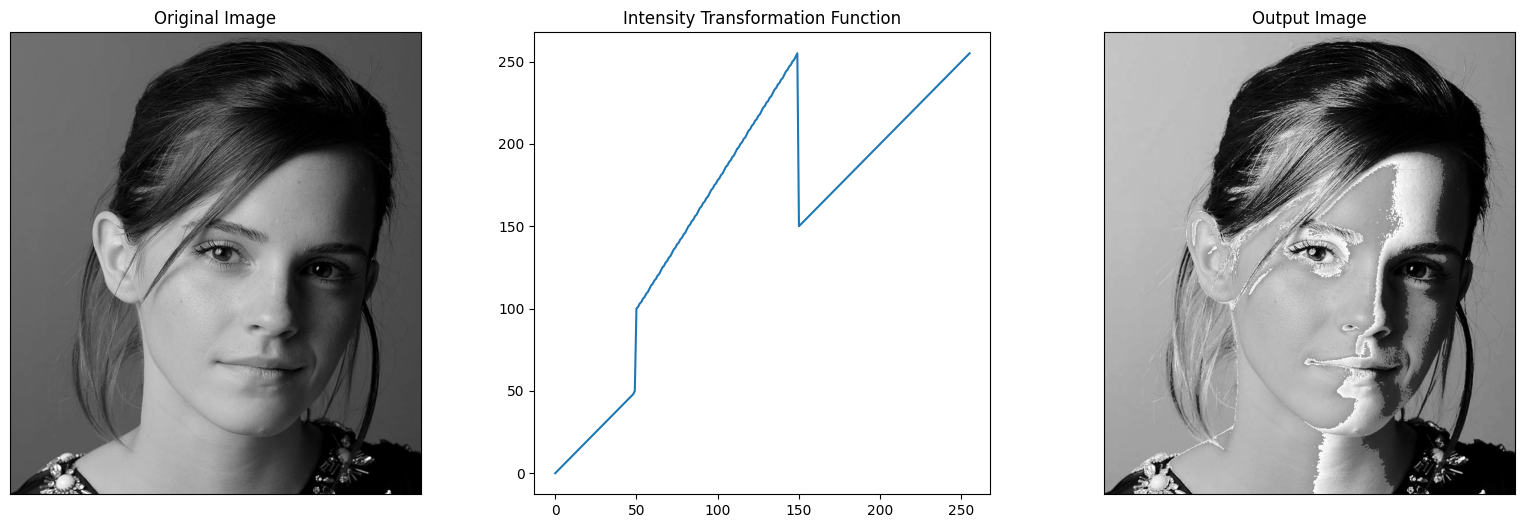

In [2]:
# Define the transformation
transform1 = np.concatenate((np.linspace(0, 50, 50), np.linspace(100, 255, 100), np.linspace(150, 255,106)), axis=0).astype(np.uint8)
print(len(transform1))

# Read the image
image_orig = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)
# Apply the transformation
image_transformed = cv.LUT(image_orig, transform1)

# Display the images
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
ax[0].imshow(image_orig, cmap = "gray", vmin=0, vmax=255)
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[0].set_title("Original Image")
ax[1].plot(transform1)
ax[1].set_title("Intensity Transformation Function")
ax[2].imshow(image_transformed, cmap = "gray", vmin=0, vmax=255)
ax[2].get_xaxis().set_visible(False)
ax[2].get_yaxis().set_visible(False)
ax[2].set_title("Output Image")
#Display the plot with grid
plt.show()



# Question 2

Part (a)

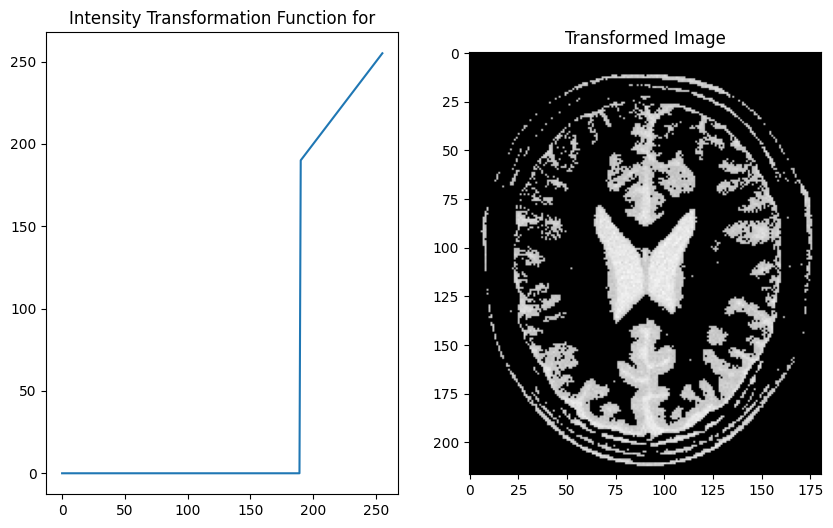

In [64]:
transform2 = np.concatenate((np.linspace(0, 0, 190), np.linspace(190,255, 66)), axis=0).astype(np.uint8)
fig2 = cv.imread("a1images/brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)



fig2_transformed_1 = cv.LUT(fig2, transform2)
fig, ax = plt.subplots(1,2, figsize=(10, 6))

ax[0].plot(transform2)
ax[0].set_title("Intensity Transformation Function for")
ax[1].imshow(fig2_transformed_1, cmap = "gray", vmin=0, vmax=255)
ax[1].get_xaxis().set_visible(True)
ax[1].get_yaxis().set_visible(True)
ax[1].set_title("Transformed Image")

plt.show()

Part (b)

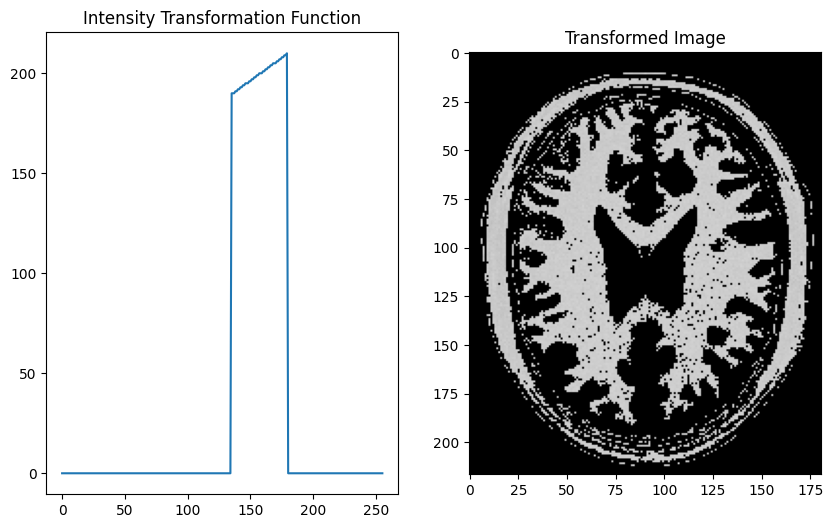

In [66]:
transform3 = np.concatenate((np.linspace(0, 0, 135), np.linspace(190, 210, 45),np.linspace(0, 0, 76)), axis=0).astype(np.uint8)
fig2 = cv.imread("a1images/brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)

fig2_transformed_1 = cv.LUT(fig2, transform3)
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

ax[0].plot(transform3)
ax[0].set_title("Intensity Transformation Function")
ax[1].imshow(fig2_transformed_1, cmap = "gray", vmin=0, vmax=255)
ax[1].get_xaxis().set_visible(True)
ax[1].get_yaxis().set_visible(True)
ax[1].set_title("Transformed Image")

plt.show()

# Question 3


Text(0, 0.5, 'Frequency')

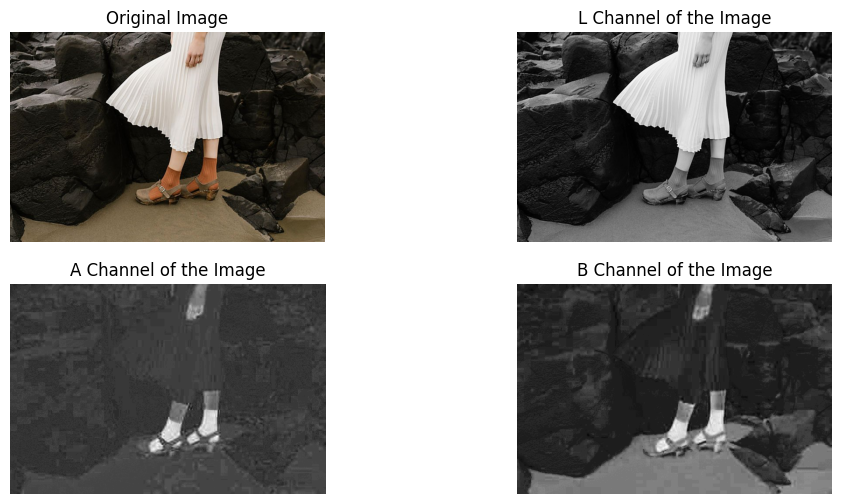

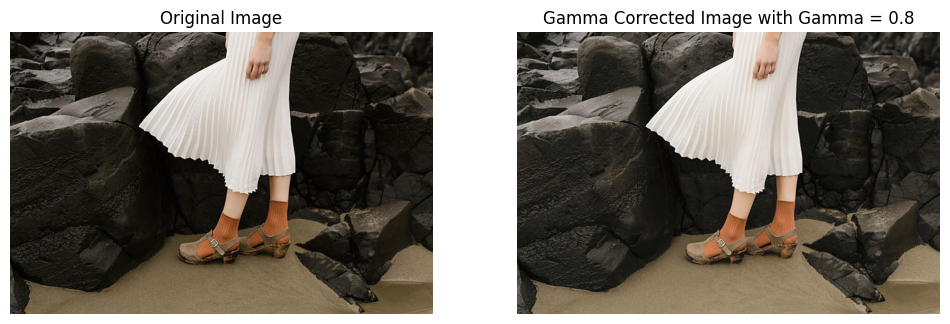

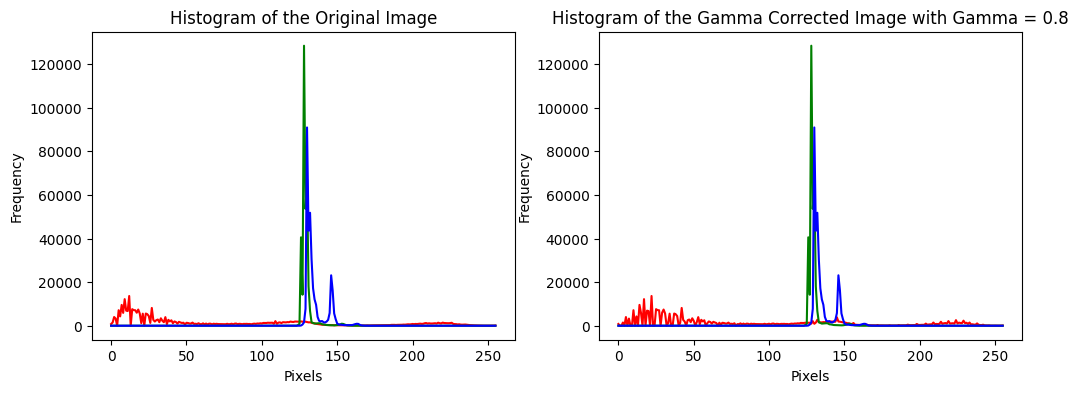

In [82]:
original_image = cv.imread('a1images/highlights_and_shadows.jpg', cv.IMREAD_COLOR)

rgb_image = cv.cvtColor(original_image, cv.COLOR_BGR2RGB)

# Image into CEILAB color space
CEILAB_image = cv.cvtColor(original_image, cv.COLOR_BGR2Lab) 
# Split into three channels         
L_chanel, a_channel, b_channel = cv.split(CEILAB_image)  

# Apply gamma correction to the L channel 
gamma = 0.8
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0, 256)]).astype('uint8')
L_chanel_gamma_corrected = cv.LUT(L_chanel, table)    

# Merge L channel with other channels
img_gamma = cv.merge((L_chanel_gamma_corrected, a_channel, b_channel))     
corrected_image = cv.cvtColor(img_gamma, cv.COLOR_Lab2RGB)


# Display the images with their respective channels
plt.figure(figsize=(12,6))

plt.subplot(221)
plt.imshow(rgb_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(222)
plt.imshow(L_chanel, cmap="gray")
plt.title('L Channel of the Image')
plt.axis('off')

plt.subplot(223)
plt.imshow(a_channel, cmap="gray")
plt.title('A Channel of the Image')
plt.axis('off')

plt.subplot(224)
plt.imshow(b_channel, cmap="gray")
plt.title('B Channel of the Image')
plt.axis('off')



fig, ax = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(12,6))
ax[0].imshow(rgb_image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(corrected_image)
ax[1].set_title(f'Gamma Corrected Image with Gamma = {gamma}')
ax[1].axis('off')


f, ax = plt.subplots(1, 2, figsize=(12, 4))
chanel = ('l', 'a', 'b')
color = ('r', 'g', 'b')

for i, j in enumerate(chanel):
    hist_orig = cv.calcHist([CEILAB_image], [i], None, [256], [0, 256]) 
    # Calculate histogram for original image      
    ax[0].plot(hist_orig, color=color[i])
    hist_gamma = cv.calcHist([img_gamma], [i], None, [256], [0, 256]) 
    # Calculate histogram for gamma corrected image      
    ax[1].plot(hist_gamma, color=color[i])


# Plot the histogram of the original image
ax[0].set_title('Histogram of the Original Image')
ax[0].set_xlabel('Pixels')
ax[0].set_ylabel('Frequency')


# Plot the histogram of the gamma corrected image with the gamma value
ax[1].set_title(f'Histogram of the Gamma Corrected Image with Gamma = {gamma}')
ax[1].set_xlabel('Pixels')
ax[1].set_ylabel('Frequency')

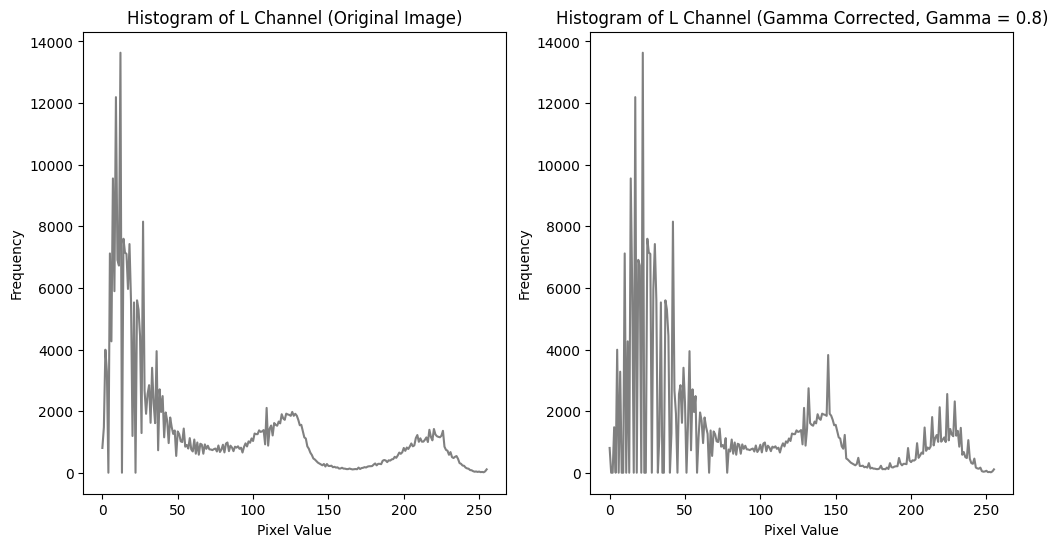

In [84]:
# Plot the histograms for the original and gamma-corrected L channel
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Display the histogram of the L channel (Original Image)
hist_orig_L = cv.calcHist([L_chanel], [0], None, [256], [0, 256])
ax[0].plot(hist_orig_L, color='gray')
ax[0].set_title('Histogram of L Channel (Original Image)')
ax[0].set_xlabel('Pixel Value')
ax[0].set_ylabel('Frequency')

# Display the histogram of the L channel (Gamma Corrected)
hist_corrected_L = cv.calcHist([L_chanel_gamma_corrected], [0], None, [256], [0, 256])
ax[1].plot(hist_corrected_L, color='gray')
ax[1].set_title(f'Histogram of L Channel (Gamma Corrected, Gamma = {gamma})')
ax[1].set_xlabel('Pixel Value')
ax[1].set_ylabel('Frequency')


plt.show()


# Question 4

In [68]:
from ipywidgets import interactive,fixed

def vibrance(x, a, sigma=70):
    # Transformfunction
    return int(min(x + (a*128)*np.exp((-(x-128)**2)/(2*(sigma**2))), 255))  

def transform(a,image):
    
    table = np.array([vibrance(x, a) for x in np.arange(0, 256)]).astype('uint8')

    # Split the image 
    h_channel, s_channel, v_channel = cv.split(image) 
    # Apply vibrance correction to the saturation plane 
    s_channel_corrected = cv.LUT(s_channel, table)          
    img_corrected = cv.merge((h_channel, s_channel_corrected, v_channel)) 
    # Merge corrected plane   
    img_corrected_rgb = cv.cvtColor(img_corrected, cv.COLOR_HSV2RGB)

    plt.figure(figsize=(12,12))
    plt.subplot(121)
    plt.imshow(rgb_image)
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(122)
    plt.imshow(img_corrected_rgb)
    plt.title('Intensity Transformed Image')
    plt.axis('off')
    
    plt.show()
    
    a_value = np.arange(0, 256)
    plt.figure(figsize=(4,4))
    plt.plot(a_value,table, label=f'a = {a}')
    plt.title('Intensity Transformation Function')
    plt.xlabel('Input Intensity')
    plt.ylabel('Transformed Intensity')
    plt.legend()
    
    plt.show()


spyder_image = cv.imread('a1images/spider.png', cv.IMREAD_COLOR)
rgb_image = cv.cvtColor(spyder_image, cv.COLOR_BGR2RGB)
hsv_image = cv.cvtColor(spyder_image, cv.COLOR_BGR2HSV)           # Convert the image into HSV color space
   

# Interactive Slider
output_images = interactive(transform, a=(0, 5, 0.001), image=fixed(hsv_image))
output = output_images.children[-1]
output.layout.height = '700px'
output_images

interactive(children=(FloatSlider(value=2.0, description='a', max=5.0, step=0.001), Output(layout=Layout(heigh…

# Question 5

In [104]:
def histogram_equalization(image):
    histogram, bins = np.histogram(image.ravel(), 256, [0, 256])
    cdf = histogram.cumsum()
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    cdf_normalized = cdf_normalized.astype('uint8')
    equalized = cdf_normalized[image]

    return equalized
    

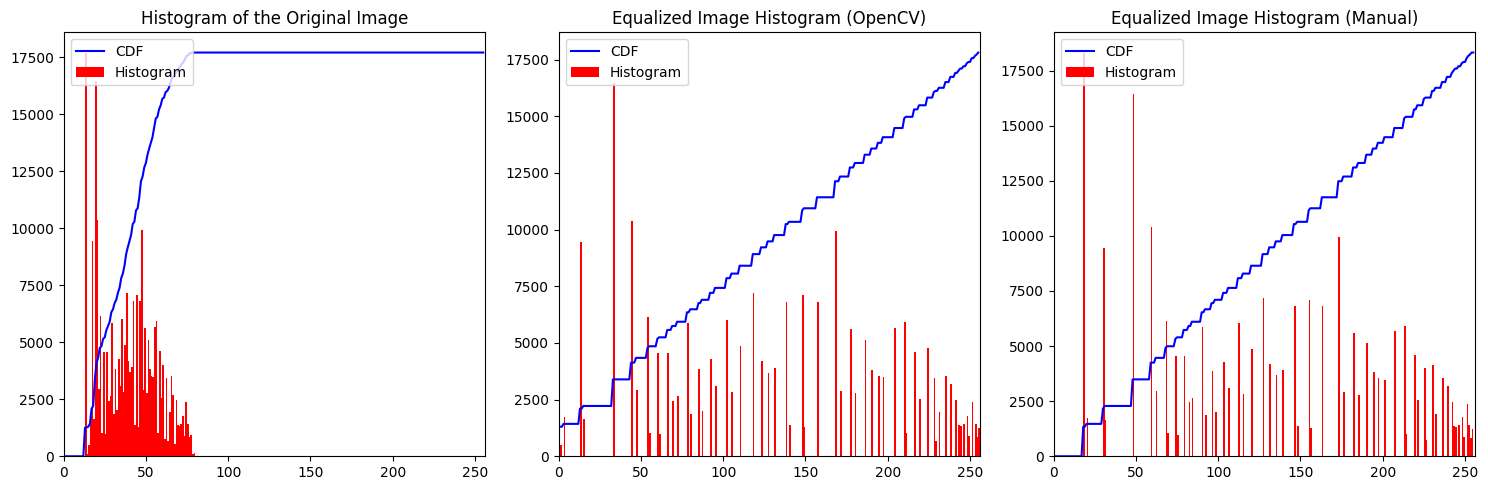

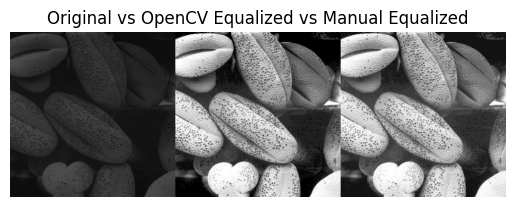

In [106]:
shell_image = cv.imread('a1images/shells.tif', cv.IMREAD_GRAYSCALE)

#Equalize the image using OpenCV's built-in function
equalized_opencv = cv.equalizeHist(shell_image)

#Equalize the image using manual method
equalized_manual = histogram_equalization(shell_image)


plt.figure(figsize=(15, 5))

#Original Image Histogram
plt.subplot(1, 3, 1)
hist_orig, bins_orig = np.histogram(shell_image.ravel(), 256, [0, 256])
cdf_orig = hist_orig.cumsum()
cdf_normalized_orig = cdf_orig * hist_orig.max() / cdf_orig.max()
plt.plot(cdf_normalized_orig, color='b')
plt.hist(shell_image.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('CDF', 'Histogram'), loc='upper left')
plt.title('Histogram of the Original Image')

#Equalized Image Histogram using OpenCV
plt.subplot(1, 3, 2)
hist_eq_opencv, bins_eq_opencv = np.histogram(equalized_opencv.ravel(), 256, [0, 256])
cdf_eq_opencv = hist_eq_opencv.cumsum()
cdf_eq_normalized_opencv = cdf_eq_opencv * hist_eq_opencv.max() / cdf_eq_opencv.max()
plt.plot(cdf_eq_normalized_opencv, color='b')
plt.hist(equalized_opencv.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('CDF', 'Histogram'), loc='upper left')
plt.title('Equalized Image Histogram (OpenCV)')

# Equalized Image Histogram using Manual Method
plt.subplot(1, 3, 3)
hist_eq_manual, bins_eq_manual = np.histogram(equalized_manual.ravel(), 256, [0, 256])
cdf_eq_manual = hist_eq_manual.cumsum()
cdf_eq_normalized_manual = cdf_eq_manual * hist_eq_manual.max() / cdf_eq_manual.max()
plt.plot(cdf_eq_normalized_manual, color='b')
plt.hist(equalized_manual.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('CDF', 'Histogram'), loc='upper left')
plt.title('Equalized Image Histogram (Manual)')

plt.tight_layout()
plt.show()

# Original and equalized images
res = np.hstack((shell_image, equalized_opencv, equalized_manual))
plt.axis('off')
plt.imshow(res, cmap='gray')
plt.title('Original vs OpenCV Equalized vs Manual Equalized')
plt.show()


# Question 6

Part (a)

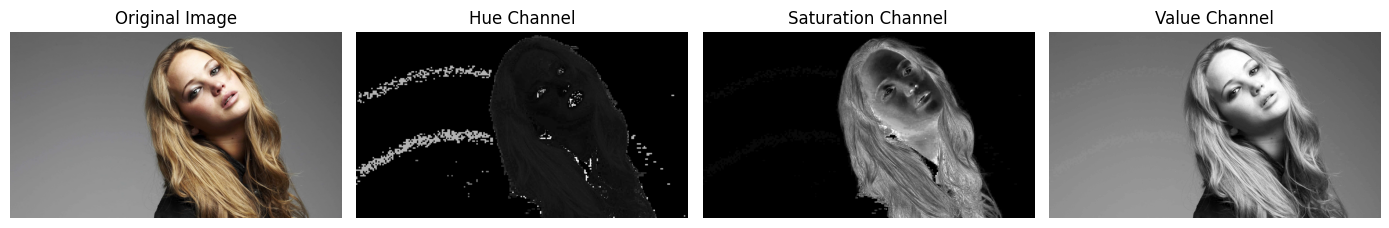

In [108]:
jennifer_image = cv.imread('a1images/jeniffer.jpg', cv.IMREAD_COLOR)
rgb_img = cv.cvtColor(jennifer_image, cv.COLOR_BGR2RGB)

img_hsv = cv.cvtColor(jennifer_image, cv.COLOR_BGR2HSV)       # Convert the image into HSV color space
h_channel, s_channel, v_channel = cv.split(img_hsv)     # Split the converted image into hue, saturation and value planes


fig, ax = plt.subplots(1, 4, figsize=(14, 6))

# Plot the original image
ax[0].imshow(rgb_img, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

# Plot the Hue channel
ax[1].imshow(h_channel, cmap='gray')
ax[1].set_title('Hue Channel')
ax[1].axis('off')

# Plot the Saturation channel
ax[2].imshow(s_channel, cmap='gray')
ax[2].set_title('Saturation Channel')
ax[2].axis('off')

# Plot the Value channel
ax[3].imshow(v_channel, cmap='gray')
ax[3].set_title('Value Channel')
ax[3].axis('off')

# Adjust the layout to prevent overlap
fig.tight_layout()

# Display the plot
plt.show()

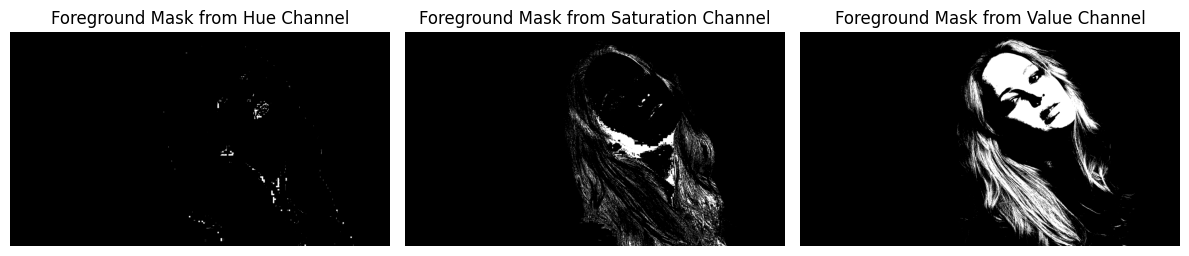

In [110]:
# Select a threshold value randomly
threshold = 165

# Apply thresholding on three channels seperately
ret1, foreground_mask1 = cv.threshold(h_channel, threshold, 255, cv.THRESH_BINARY)
ret2, foreground_mask2 = cv.threshold(s_channel, threshold, 255, cv.THRESH_BINARY)
ret3, foreground_mask3 = cv.threshold(v_channel, threshold, 255, cv.THRESH_BINARY)


fig, ax = plt.subplots(1, 3, figsize=(12, 6))

# Plot the foreground mask from the Hue channel
ax[0].imshow(foreground_mask1, cmap='gray')
ax[0].set_title('Foreground Mask from Hue Channel')
ax[0].axis('off')

# Plot the foreground mask from the Saturation channel
ax[1].imshow(foreground_mask2, cmap='gray')
ax[1].set_title('Foreground Mask from Saturation Channel')
ax[1].axis('off')

# Plot the foreground mask from the Value channel
ax[2].imshow(foreground_mask3, cmap='gray')
ax[2].set_title('Foreground Mask from Value Channel')
ax[2].axis('off')

# Adjust layout to prevent overlap
fig.tight_layout()

# Display the plot
plt.show()

Part (b) / Part (c)

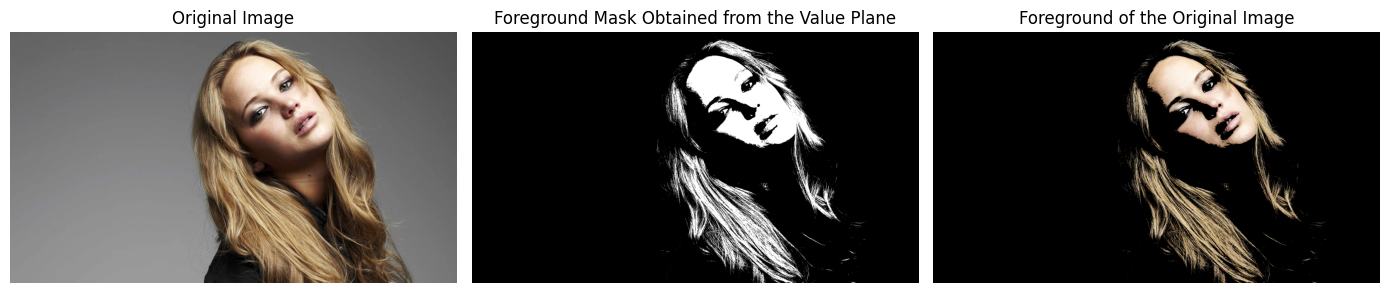

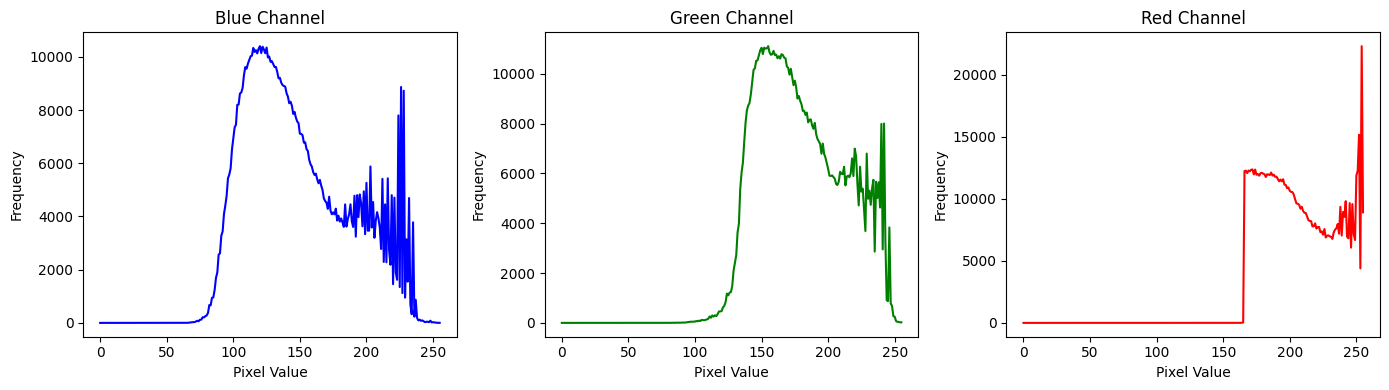

In [119]:
# Obtain the foreground using the mask from the value channel
foreground_img = cv.bitwise_and(jennifer_image, jennifer_image, mask=foreground_mask3)

# Create the figure and axes using the object-oriented approach
fig, ax = plt.subplots(1, 3, figsize=(14, 6))

# Plot the original image
ax[0].imshow(cv.cvtColor(jennifer_image, cv.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
ax[0].set_title('Original Image')
ax[0].axis('off')

# Plot the foreground mask in grayscale
ax[1].imshow(foreground_mask3, cmap='gray')
ax[1].set_title('Foreground Mask Obtained from the Value Plane')
ax[1].axis('off')

# Plot the extracted foreground of the original image
ax[2].imshow(cv.cvtColor(foreground_img, cv.COLOR_BGR2RGB))  # Convert BGR to RGB
ax[2].set_title('Foreground of the Original Image')
ax[2].axis('off')

# Adjust layout to prevent overlap
fig.tight_layout()

# Display the plot
plt.show()

# Calculate histograms for the foreground of each channel in BGR color space
b_hist = cv.calcHist([foreground_img], [0], foreground_mask3, [256], [0, 256])
g_hist = cv.calcHist([foreground_img], [1], foreground_mask3, [256], [0, 256])
r_hist = cv.calcHist([foreground_img], [2], foreground_mask3, [256], [0, 256])

# Create the figure and axes using the object-oriented interface
fig, ax = plt.subplots(1, 3, figsize=(14, 4))

# Plot the Blue channel histogram
ax[0].plot(b_hist, color='blue')
ax[0].set_title('Blue Channel')
ax[0].set_xlabel('Pixel Value')
ax[0].set_ylabel('Frequency')

# Plot the Green channel histogram
ax[1].plot(g_hist, color='green')
ax[1].set_title('Green Channel')
ax[1].set_xlabel('Pixel Value')
ax[1].set_ylabel('Frequency')

# Plot the Red channel histogram
ax[2].plot(r_hist, color='red')
ax[2].set_title('Red Channel')
ax[2].set_xlabel('Pixel Value')
ax[2].set_ylabel('Frequency')

# Adjust layout to prevent overlap
fig.tight_layout()

# Display the plot
plt.show()

Part (d)

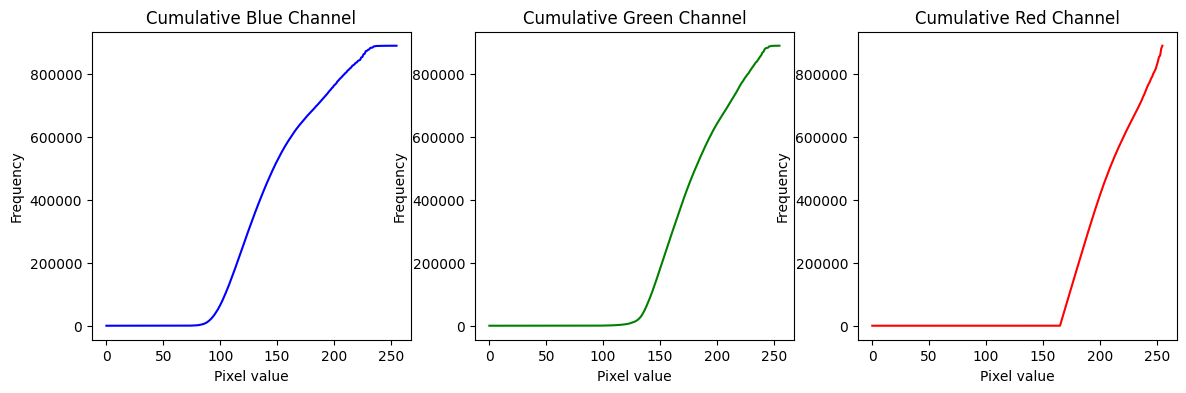

In [121]:
# Obtain the culmulative sum of the histogram
hist_b_cumalative = np.cumsum(b_hist)
hist_g_cumalative = np.cumsum(g_hist)
hist_r_cumalative = np.cumsum(r_hist)
# Create the figure and axes using the object-oriented interface
fig, ax = plt.subplots(1, 3, figsize=(14, 4))

# Plot the Cumulative Blue channel histogram
ax[0].plot(hist_b_cumalative, color='blue')
ax[0].set_title('Cumulative Blue Channel')
ax[0].set_xlabel('Pixel value')
ax[0].set_ylabel('Frequency')

# Plot the Cumulative Green channel histogram
ax[1].plot(hist_g_cumalative, color='green')
ax[1].set_title('Cumulative Green Channel')
ax[1].set_xlabel('Pixel value')
ax[1].set_ylabel('Frequency')

# Plot the Cumulative Red channel histogram
ax[2].plot(hist_r_cumalative, color='red')
ax[2].set_title('Cumulative Red Channel')
ax[2].set_xlabel('Pixel value')
ax[2].set_ylabel('Frequency')
plt.show()

Part (e)

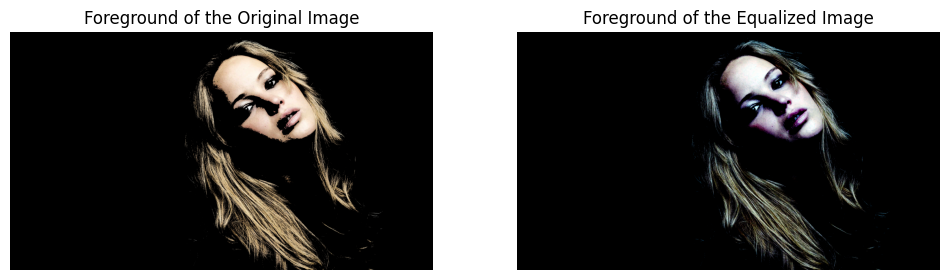

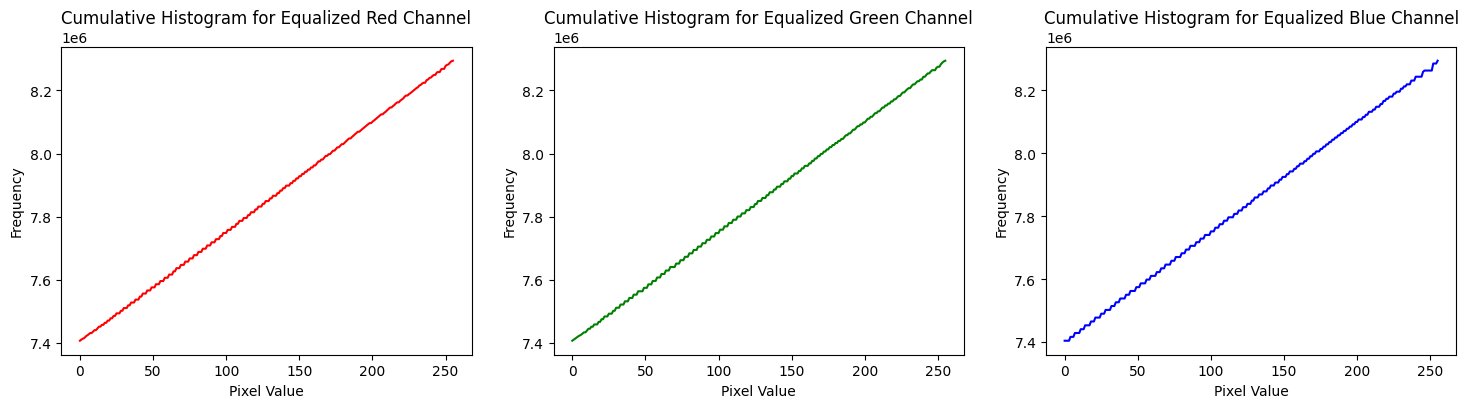

In [124]:
# Histogram equalization for three color channels
red_equalized = cv.equalizeHist(foreground_img[:, :, 0])
green_equalized = cv.equalizeHist(foreground_img[:, :, 1])
blue_equalized = cv.equalizeHist(foreground_img[:, :, 2])

# Merge the equalized channels
equalized_img = cv.merge((red_equalized, green_equalized, blue_equalized))

# Calculate the histograms for channels
red_equalized_hist = cv.calcHist([equalized_img], [0], None, [256], [0, 256])
green_equalized_hist = cv.calcHist([equalized_img], [1], None, [256], [0, 256])
blue_equalized_hist = cv.calcHist([equalized_img], [2], None, [256], [0, 256])

# Calculate the CDF for equalized channels
red_cumulative = np.cumsum(red_equalized_hist)
green_cumulative = np.cumsum(green_equalized_hist)
blue_cumulative = np.cumsum(blue_equalized_hist)


# Create the first figure to display the original and equalized images
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

# Display the foreground of the original image
ax[0].imshow(cv.cvtColor(foreground_img, cv.COLOR_BGR2RGB))
ax[0].set_title('Foreground of the Original Image')
ax[0].axis('off')

# Display the foreground of the equalized image
ax[1].imshow(cv.cvtColor(equalized_img, cv.COLOR_BGR2RGB))
ax[1].set_title('Foreground of the Equalized Image')
ax[1].axis('off')

plt.show()

# Create the second figure for cumulative histograms
fig, ax = plt.subplots(1, 3, figsize=(18, 4))

# Plot the cumulative histogram for the red channel
ax[0].plot(red_cumulative, color='red')
ax[0].set_title('Cumulative Histogram for Equalized Red Channel')
ax[0].set_xlabel('Pixel Value')
ax[0].set_ylabel('Frequency')

# Plot the cumulative histogram for the green channel
ax[1].plot(green_cumulative, color='green')
ax[1].set_title('Cumulative Histogram for Equalized Green Channel')
ax[1].set_xlabel('Pixel Value')
ax[1].set_ylabel('Frequency')

# Plot the cumulative histogram for the blue channel
ax[2].plot(blue_cumulative, color='blue')
ax[2].set_title('Cumulative Histogram for Equalized Blue Channel')
ax[2].set_xlabel('Pixel Value')
ax[2].set_ylabel('Frequency')

plt.show()

Part (f)

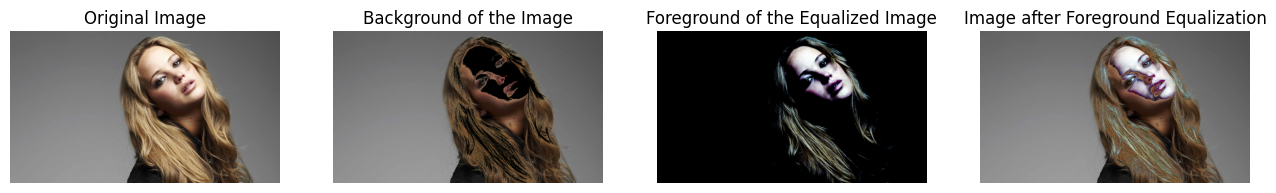

In [125]:
# Extract the background by bitwise_not
background = cv.bitwise_and(jennifer_image, jennifer_image, mask=cv.bitwise_not(foreground_mask3))

final_modified_img = cv.add(background, equalized_img)
final_modified_img_rgb = cv.cvtColor(final_modified_img, cv.COLOR_BGR2RGB)


# Create a figure with 4 subplots
fig, ax = plt.subplots(1, 4, figsize=(16, 4))

# Display the original image
ax[0].imshow(cv.cvtColor(jennifer_image, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis('off')

# Display the background of the image
ax[1].imshow(cv.cvtColor(background, cv.COLOR_BGR2RGB))
ax[1].set_title("Background of the Image")
ax[1].axis('off')

# Display the equalized foreground image
ax[2].imshow(cv.cvtColor(equalized_img, cv.COLOR_BGR2RGB))
ax[2].set_title('Foreground of the Equalized Image')
ax[2].axis('off')

# Display the final modified image after foreground equalization
ax[3].imshow(final_modified_img_rgb)
ax[3].set_title("Image after Foreground Equalization")
ax[3].axis('off')

plt.show()


# Question 7

Part (a)

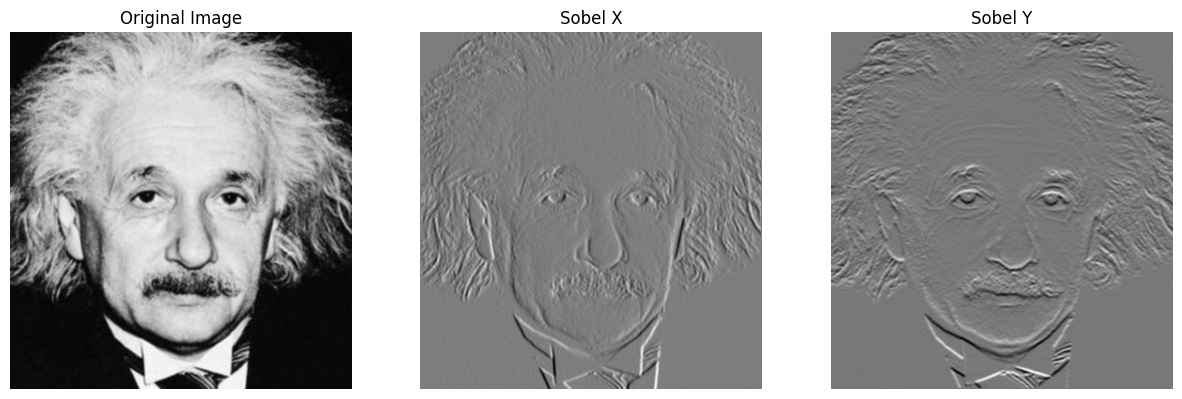

In [127]:
# Read the image
einstein_img = cv.imread('a1images/einstein.png', cv.IMREAD_GRAYSCALE)

# Sobel kernel for the x direction
sobel_x = np.array([[1, 0, -1],[2, 0, -2],[1, 0, -1]])

# Sobel kernel for the y direction
sobel_y = np.array([[1, 2, 1],[0, 0, 0],[-1, -2, -1]])

# Apply Sobel filter in x and y direction using filter2D
sobel_x_img = cv.filter2D(einstein_img, cv.CV_64F, sobel_x)
sobel_y_img = cv.filter2D(einstein_img, cv.CV_64F, sobel_y)


# Plot the images
plt.figure(figsize=(15, 8))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sobel_x_img, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sobel_y_img, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.show()

Part (b)

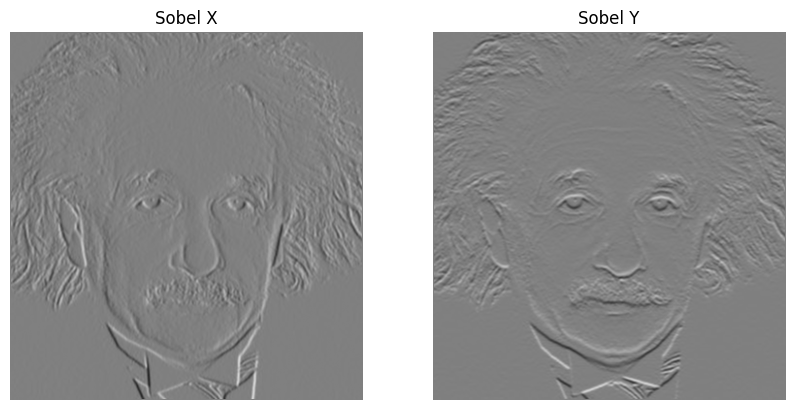

In [128]:
def sobel_filter(img):
    # Sobel x and y kernels
    sobel_x = np.array([[1, 0, -1],[2, 0, -2],[1, 0, -1]])
    sobel_y = np.array([[1, 2, 1],[0, 0, 0],[-1, -2, -1]])

    # Get image dimensions
    rows, cols = img.shape
    
    # Initialize output images for x and y direction filters
    filtered_x = np.zeros_like(img, dtype=np.float64)
    filtered_y = np.zeros_like(img, dtype=np.float64)
    
    # Apply convolution
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            # Extracting the 3x3 region around each pixel
            region = img[i-1:i+2, j-1:j+2]
            
            # Convolution with sobel_x and sobel_y
            filtered_x[i, j] = np.sum(region * sobel_x)
            filtered_y[i, j] = np.sum(region * sobel_y)


    # Combine gradients
    sobel_combined = np.sqrt(np.square(filtered_x) + np.square(filtered_y))


    
    return filtered_x, filtered_y, sobel_combined


# Apply Sobel filter
sobel_x, sobel_y, sobel_combined = sobel_filter(einstein_img)

# Plot the results
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(sobel_x, cmap='gray',vmin=-1020, vmax=1020)
plt.title('Sobel X')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sobel_y, cmap='gray',vmin=-1020, vmax=1020)
plt.title('Sobel Y')
plt.axis('off')


plt.show()

Part (c)

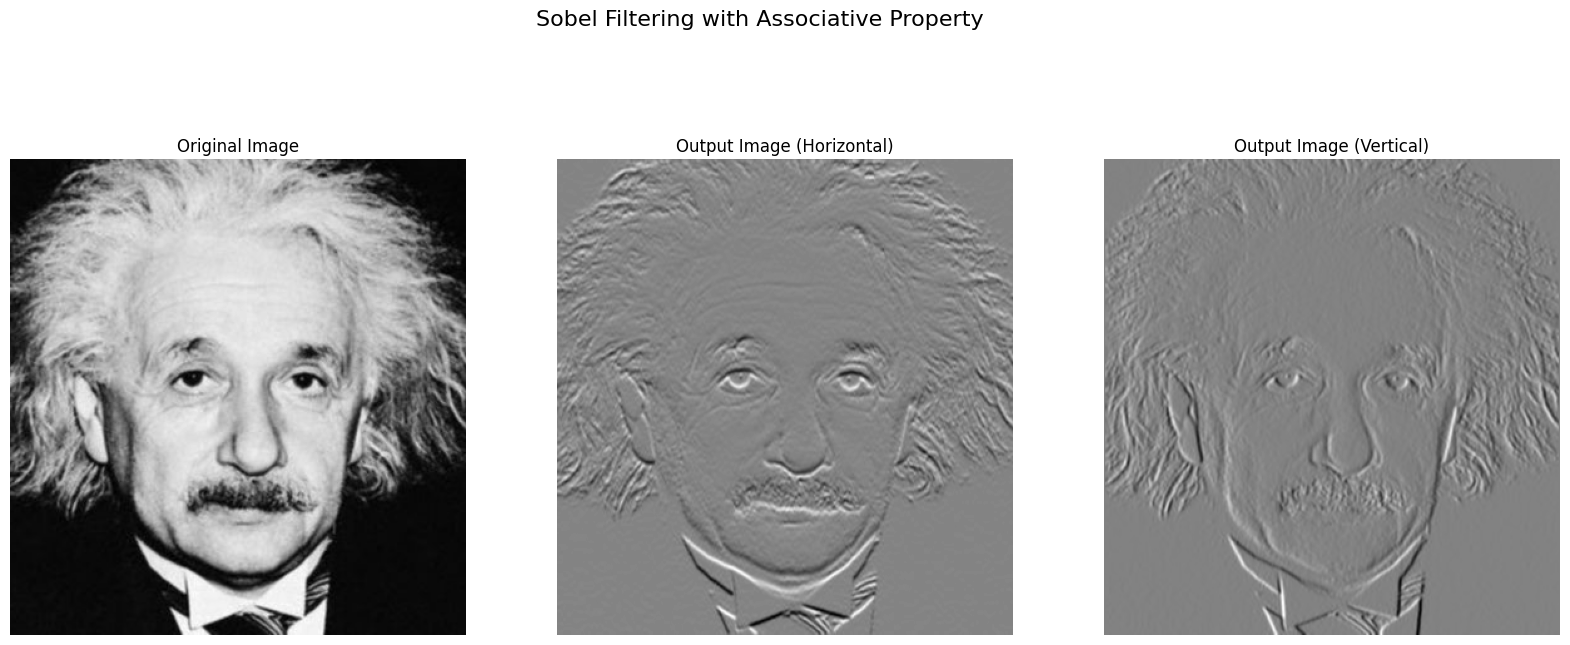

In [129]:
kernel_1 = np.array(((-1,), (0,), (1,)))
kernel_2 = np.array((1, 2, 1))

output_1 = cv.filter2D(einstein_img, cv.CV_64F, kernel_1)
output_1 = cv.filter2D(output_1, cv.CV_64F, kernel_2)

output_2 = cv.filter2D(einstein_img, cv.CV_64F, kernel_1.T)
output_2 = cv.filter2D(output_2, cv.CV_64F, kernel_2.T)

plt.figure(figsize=(20, 8))
plt.suptitle('Sobel Filtering with Associative Property',fontsize=16)
plt.subplot(1, 3, 1)
plt.imshow(einstein_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(output_1, cmap='gray')
plt.title('Output Image (Horizontal)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(output_2, cmap='gray')
plt.title('Output Image (Vertical)')
plt.axis('off')

plt.show()


 

# Question 8

part(a)

In [55]:
def image_zooming(image,zooming_factor):

    height,width,chanels = image.shape

    zoomed_height = int(height*zooming_factor) 
    zoomed_width = int(width*zooming_factor)

    zoomed_image = np.zeros((zoomed_height,zoomed_width,chanels),dtype=np.uint8)

    for i in range(zoomed_height):
        for j in range(zoomed_width):
            x = int(i/zooming_factor)
            y = int(j/zooming_factor)
            zoomed_image[i,j] = image[x,y]

    return zoomed_image


In [63]:

def normalized_sum_of_squared_difference(image1, image2):
    # Calculate the sum of squared differences
    ssd = np.sum((image1 - image2) ** 2)
    
    # Normalize by the number of pixels
    normalized_ssd = ssd / image1.size
    
    return normalized_ssd


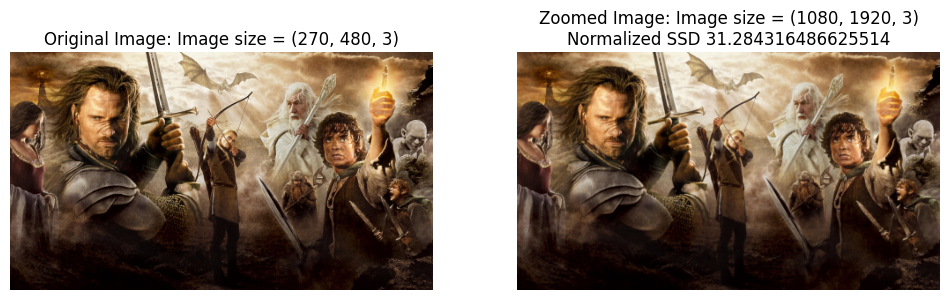

In [64]:
# Read the image
image01 = cv.imread('a1images/a1q5images/im01small.png', cv.IMREAD_COLOR)
Large_image01 = cv.imread('a1images/a1q5images/im01.png', cv.IMREAD_COLOR)
# Zooming factor
zooming_factor = 4

# Apply zooming
zoomed_image = image_zooming(image01, zooming_factor)
normalized_SSD = normalized_sum_of_squared_difference(Large_image01,zoomed_image)

# Display the images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image01, cv.COLOR_BGR2RGB))
plt.title(f'Original Image: Image size = {image01.shape}')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(zoomed_image, cv.COLOR_BGR2RGB))
plt.title(f'Zoomed Image: Image size = {zoomed_image.shape}\nNormalized SSD {normalized_SSD}')
plt.axis('off')

plt.show()


In [65]:
def Bilinear_interpolation(image, zoom_factor):
    # Get the dimensions of the image
    height, width, channels = image.shape
    
    # Calculate the new dimensions
    new_height = int(height * zoom_factor) - 1
    new_width = int(width * zoom_factor)
    
    # Create a new image with the new dimensions
    new_image = np.zeros((new_height, new_width, channels), dtype=np.uint8)
    
    # Calculate the scaling factor for height and width
    scale_height = height / new_height
    scale_width = width / new_width
    
    # Iterate through the new image and assign pixel values
    for i in range(new_height):
        for j in range(new_width):
            # Calculate corresponding pixel value in the original image
            x = i * scale_height
            y = j * scale_width
            
            # Find nearest pixel values
            x0 = int(np.floor(x))
            x1 = min(x0 + 1, height - 1)
            y0 = int(np.floor(y))
            y1 = min(y0 + 1, width - 1)
            
            # Calculate weights
            dx = x - x0
            dy = y - y0
            
            # Perform bilinear interpolation
            new_image[i, j] = (
                (1 - dx) * (1 - dy) * image[x0, y0] +
                dx * (1 - dy) * image[x1, y0] +
                (1 - dx) * dy * image[x0, y1] +
                dx * dy * image[x1, y1]
            )
    
    return new_image

In [51]:
image02 = cv.imread('a1images/a1q5images/im03small.png', cv.IMREAD_COLOR)
zoom_image_inter = Bilinear_interpolation(image02, 4)

Text(0.5, 1.0, 'Zoomed Image: Image size = (1459, 2400, 3)\nNormalize SSD = 23.782190522427843')

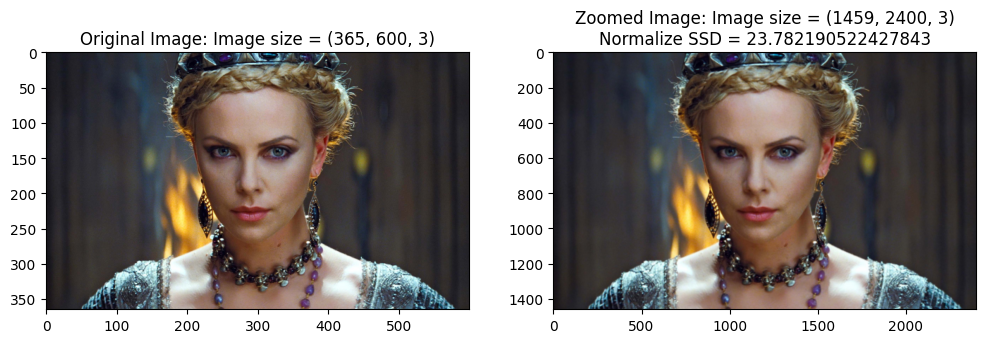

In [67]:
Large_image02 = cv.imread('a1images/a1q5images/im03.png', cv.IMREAD_COLOR)
Normalized_SSD = normalized_sum_of_squared_difference(Large_image02,zoom_image_inter)
#Display the zoomed image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image02, cv.COLOR_BGR2RGB))
plt.title(f'Original Image: Image size = {image02.shape}')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(zoom_image_inter, cv.COLOR_BGR2RGB))
plt.title(f'Zoomed Image: Image size = {zoom_image_inter.shape}\nNormalize SSD = {Normalized_SSD}')

# Question 9

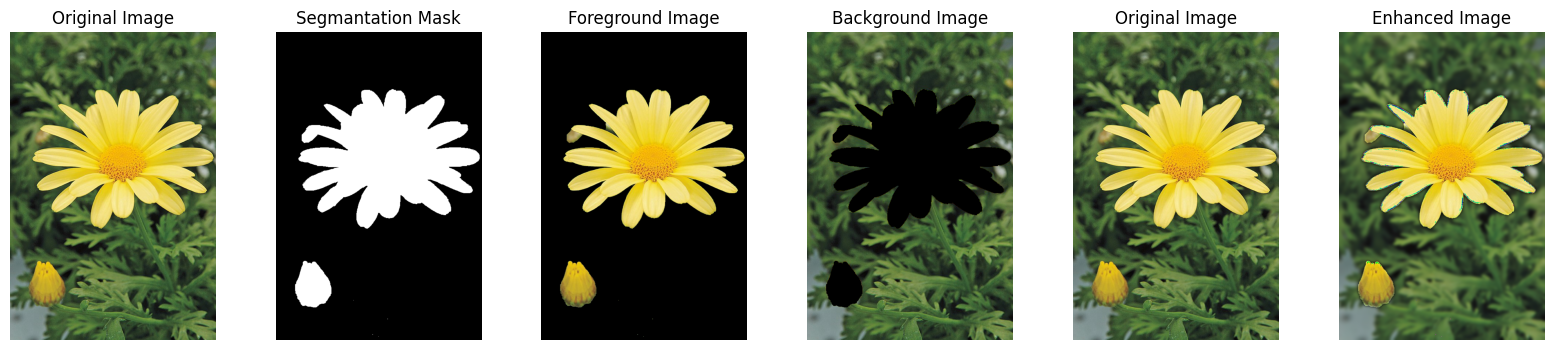

In [26]:
daisy_image = cv.imread('a1images/daisy.jpg', cv.IMREAD_COLOR)

# Create a mask and foreground, background models to initialize GrabCut algorithm
foreground_mask = np.zeros(daisy_image.shape[:2], np.uint8)
foreground_model = np.zeros((1, 65), np.float64)
background_model = np.zeros((1, 65), np.float64)

# Define rectangles around the foreground
rectangle = (50,50, daisy_image.shape[1] - 50, daisy_image.shape[0] - 50)                                 

cv.grabCut(daisy_image, foreground_mask, rectangle, background_model, foreground_model, 5, cv.GC_INIT_WITH_RECT)   

# Modify the mask
new_mask = np.where((foreground_mask == 2) | (foreground_mask == 0), 0, 1).astype('uint8')                            

# Extract the foreground and background images
foreground_image = daisy_image * new_mask[:, :, np.newaxis]
background_image = daisy_image * (1 - new_mask[:, :, np.newaxis])

# Apply Gaussian blur to the background
background_blurred_img = cv.GaussianBlur(background_image, (21, 21), 0)                           

# Combine blurred and original images together
enhanced_img = foreground_image + background_blurred_img                                          

plt.figure(figsize=(20, 4))

plt.subplot(161)
plt.imshow(cv.cvtColor(daisy_image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')


plt.subplot(162)
plt.imshow(new_mask, cmap='gray')
plt.title('Segmantation Mask')
plt.axis('off')


plt.subplot(163)
plt.imshow(cv.cvtColor(foreground_image, cv.COLOR_BGR2RGB))
plt.title('Foreground Image')
plt.axis('off')


plt.subplot(164)
plt.imshow(cv.cvtColor(background_image, cv.COLOR_BGR2RGB))
plt.title('Background Image')
plt.axis('off')



plt.subplot(165)
plt.imshow(cv.cvtColor(daisy_image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(166)
plt.imshow(cv.cvtColor(enhanced_img, cv.COLOR_BGR2RGB))
plt.title('Enhanced Image')
plt.axis('off')

plt.show()

